## Wine data classification using kNN



In [3]:
# import required modules
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

# Import scikit-learn dataset library
from sklearn import datasets

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Load dataset
wine = datasets.load_wine(as_frame=True)

# TODO: Find out the type of wine, features ect and print info about it 
print(wine.feature_names)
print(wine.target_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']


In [5]:
# TODO: Find out X and y shapes
print(wine.data.shape)
print(wine.target.shape)

(178, 13)
(178,)


In [6]:
# TODO: Split dataset into training set and test set (70% training and 30% test)
X = wine.data
X_train, X_test, y_train, y_test = train_test_split(X, wine.target, test_size=0.3, random_state=100)
X_train.shape, X_test.shape

((124, 13), (54, 13))

In [7]:
# TODO: Scale input set using snv
scaler = preprocessing.StandardScaler()

use_scaler = True
if use_scaler:
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

## Test kNN with k=5 

In [9]:
# TODO: Use kNN algorithm with k = 5 to predict the wine class
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [10]:
# TODO: Find out the accuracy score
# Model Accuracy, how often is the classifier correct?
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")

Accuracy: 0.9444444444444444


In [11]:
# TODO: print confusion matrix about the prediction
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[14,  0,  0],
       [ 1, 16,  2],
       [ 0,  0, 21]], dtype=int64)

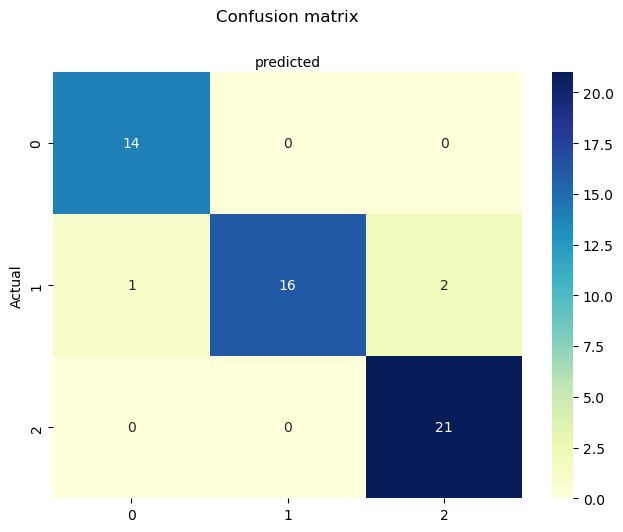

In [12]:
# TODO: create heatmap from confusion matrix
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('predicted')
plt.show()

## Improving kNN Performances in scikit-learn Using GridSearchCV

When you use few neighbors, you have a prediction that will be much more variable than when you use more neighbors:

- If you use one neighbor only, the prediction can strongly change from one point to the other. When you think about your own neighbors, one may be quite different from the others. If you lived next to an outlier, your 1-NN prediction would be wrong.
- If you have multiple data points, the impact of one extremely different neighbor will be much less.
- If you use too many neighbors, the prediction of each point risks being very close. Let’s say that you use all neighbors for a prediction. In that case, every prediction would be the same.

To find the best value for k, you’re going to use a tool called GridSearchCV. This is a tool that is often used for tuning hyperparameters of machine learning models. In your case, it will help by automatically finding the best value of k for your dataset.

In [14]:
# TODO: Find out best features using GridSearchCV
parameters = {
    "n_neighbors": [1,3,5,7,9,11,13,15,17,19,21,23,25],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}
gs = GridSearchCV(KNeighborsClassifier(), parameters, cv=5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25],
                         'weights': ['uniform', 'distance']})

In [15]:
# TODO: Find out best params 
print(f'Best score: {gs.best_score_}')
print(f'Best estimator: {gs.best_estimator_}')
print(f'Best score: {gs.best_params_}')

Best score: 0.984
Best estimator: KNeighborsClassifier(metric='euclidean', n_neighbors=7)
Best score: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}


In [16]:
# TODO: Try with the best values
# Create KNN Classifier
knn_best = KNeighborsClassifier(n_neighbors=7, metric="euclidean", weights="uniform")
# Train the model using the training sets
knn_best.fit(X_train, y_train)
# Predict the response for test dataset
y_pred = knn_best.predict(X_test)

In [17]:
# TODO: Model Accuracy, how often is the classifier correct?
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")

Accuracy: 0.9444444444444444
